#Pandas

- 데이터 분석 및 데이터 전처리를 위한 파이썬 라이브러리 (오픈소스)
- 10minute to pandas 참고 : https://pandas.pydata.org/docs/user_guide/10min.html

- 활용
  - SQL 테이블, Excel 자동화
  - 대부분 정제된 데이터는 테이블 형태이며, 테이블 분석에 최적임
  - 정형화된 데이터 연산에 최적
  - 엑셀보다 대용량 데이터 관리 가능
  - 다양한 정형 데이터의 통합 관리 가능 (json, html, csv, sql 등)
  - 엑셀에서 제공하는 연산 기능을 거의 모두 제공한다
  - 다양한 데이터 시각화

# alias(별칭)와 버전

In [1]:
import pandas

In [2]:
pandas.__version__

'2.2.2'

In [3]:
#pandas는 pd의 alias를 사용한다
import pandas as pd

In [4]:
pd

<module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>

# 자료 구조

- 자료구조는 2개만 알면 된다
  - 1d : series
  - 2d : dataframe
  - 3d : panel
  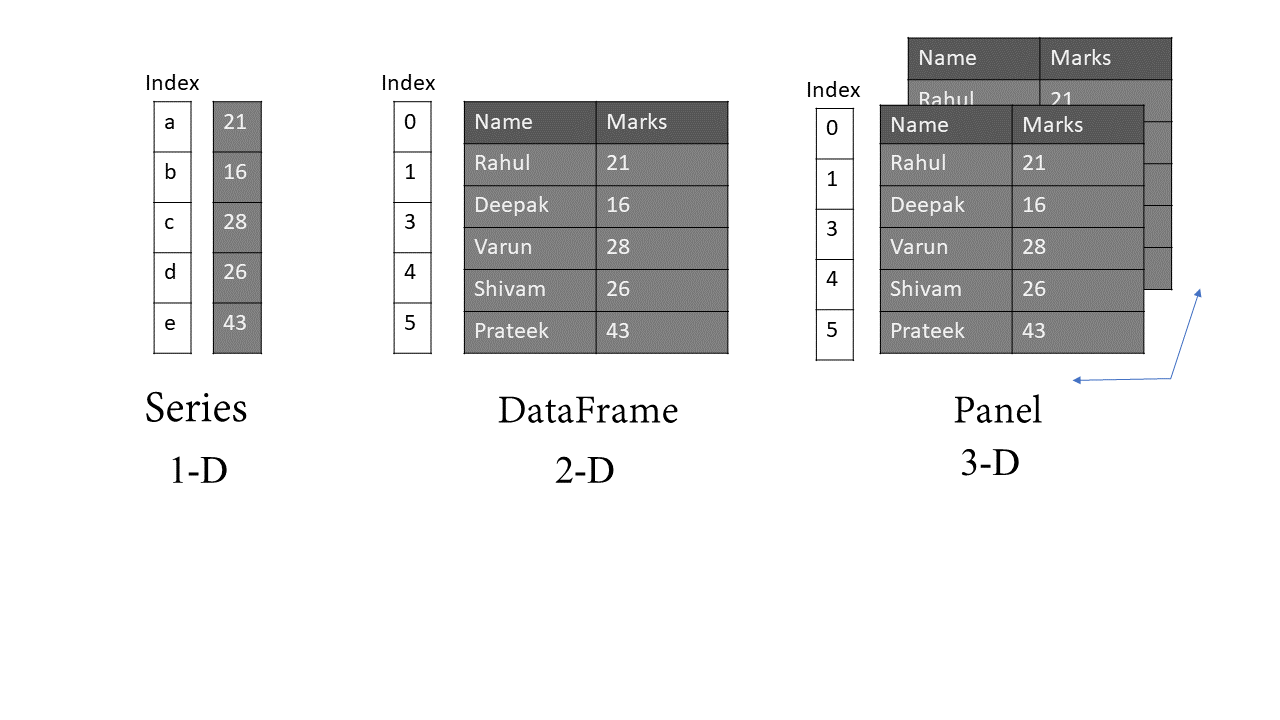

# series

- 차원 배열 구조 : 데이터를 담는 차원 배열 구조를 가진다
- 인덱스(index)의 사용 가능
- dtype : 데이터 타입을 가진다

## series 의 생성

### numpy array로 생성한 경우

In [6]:
import numpy as np
arr = np.arange(100, 105)
arr

array([100, 101, 102, 103, 104])

In [7]:
s = pd.Series(arr)
s
#dtype 즉, 테이블 내의 데이터의 타입을 의미한다. int 유형이다.

,0
0,100
1,101
2,102
3,103
4,104


### dtype을 지정하는 경우

In [8]:
s = pd.Series(arr, dtype='int32')
s

,0
0,100
1,101
2,102
3,103
4,104


### list로 시리즈 생성하기
  - 넘파이가 아니더라도 list로도 생성이 가능하다

In [10]:
s = pd.Series(['부장', '차장', '대리'])
s

,0
0,부장
1,차장
2,대리


### 다양한 타입(type)의 데이터를 섞는 경우
  - Object 타입으로 생성된다 !

In [12]:
s = pd.Series([31, 24, '스포츠', 4.5])
s

,0
0,31
1,24
2,스포츠
3,4.5


### 정수, 소수로 있으면 float으로 나온다 (float은 정수를 포함해준다)

In [13]:
s = pd.Series([31, 24, 4.5])
s

,0
0,31.0
1,24.0
2,4.5


### index

- .index : index를 range 형식으로 보여준다.

In [14]:
s.index

RangeIndex(start=0, stop=3, step=1)

- 음수 색인이 불가능하다
  - python에서 [-1]로 인덱싱하면 맨 마지막이 나왔지만,
  - pandas에서 인덱스는 위와 같이 start, stop 사이의 범위에서 인덱싱이 가능하다.

In [ ]:
s[-1] #에러 난다.

In [16]:
s[0]

np.float64(31.0)

### 인덱스 지정해주기

In [23]:
s = pd.Series(['도', '레', '미'], index = ['a', 'b', 'c'])
s

,0
a,도
b,레
c,미


In [24]:
s.index

Index(['a', 'b', 'c'], dtype='object')

- 기본 부여된 숫자형 index로도 접근 가능하다.
  - 단, index 리스트의 요소의 위치 값을 접근하는 개념이다

In [25]:
s.index

Index(['a', 'b', 'c'], dtype='object')

In [26]:
s[2]

/tmp/ipython-input-26-2635755408.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[2]


'미'

- series를 생성한 후 이후에 인덱스 부여도 가능하다.

In [28]:
s = pd.Series(['안', '녕', '하', '세', '요'])
s.index

RangeIndex(start=0, stop=5, step=1)

In [29]:
s.index = list('abcde')

In [30]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## series의 속성

### values

- values ?
  - series 데이터 값(values)만 numpy array 형식으로 가져온다

In [32]:
s.values
#아래와 같이 array 형식으로 .

array(['안', '녕', '하', '세', '요'], dtype=object)

### ndim

- ndim ?
  - series는 1차원 구조이기 때문에 ndim 출력 시 1이 출력된다.

In [34]:
s.ndim

1

### shape
- 데이터의 모양을 알아보기 위해
  - tuple 형식으로 나온다

In [35]:
s.shape

(5,)

## NAN 값

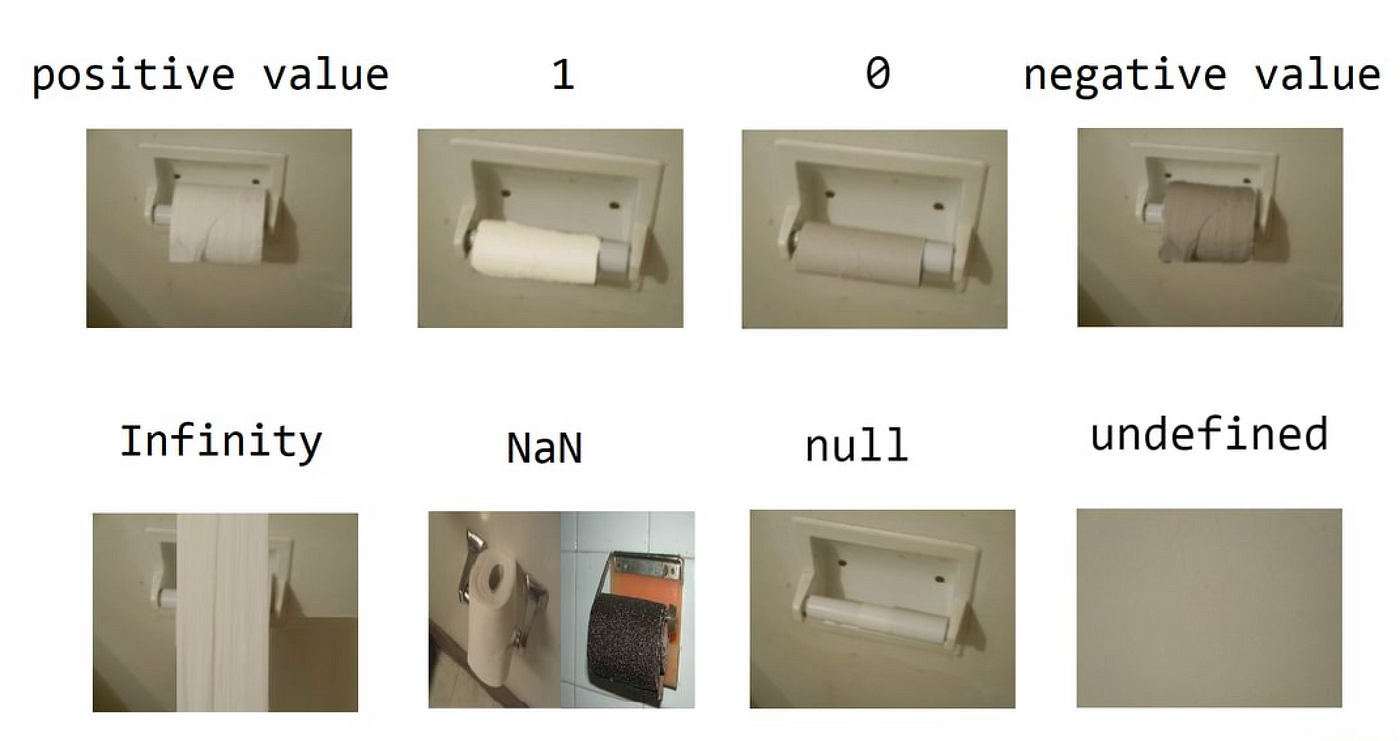

- NaN?
  - NOT A NUMBER
  - PANDAS에서 NAN값은 비어있는 결측치 데이터를 의미한다.
  - 임의로 비어있는 값을 대입하고자 할때는 Numpy의 nan (np.nan)을 입력한다

In [38]:
s = pd.Series(['선화', '강호', np.nan, '소정', '우영']) #임의로 난값 넣기
s

,0
0,선화
1,강호
2,NaN
3,소정
4,우영


# 연습 문제

- 다음과 같은 series를 생성하라
  - s1 변수에 series 생성
  - dtype은 float32 가 출력되도록 지정하기

In [39]:
s1 = pd.Series([1, 2, 3.2], dtype='float32')
s1

,0
0,1.0
1,2.0
2,3.2


- s2 변수에 series를 생성하라
  - s2[2] 에 nan값이 들어가있도록 생성

In [41]:
s2 = pd.Series([1,2,np.nan,3])
s2

,0
0,1.0
1,2.0
2,NaN
3,3.0


## indexing

In [42]:
s = pd.Series(['손흥민', '김연아', '박세리', '박찬호', '김연경'], index = ['a', 'b', 'c', 'd', 'e'])
s

,0
a,손흥민
b,김연아
c,박세리
d,박찬호
e,김연경


- index는 기본 부여된 숫자형 index와 내가 지정한 index 둘다 조회 가능하다

In [43]:
s[1]

/tmp/ipython-input-43-878419959.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[1]


'김연아'

In [44]:
s['b']

'김연아'

### fancy indexing

- index를 선택하여 list로 정의하고, 선택한 index list로 indexing 하는 방법

In [45]:
s[['a', 'c']]

,0
a,손흥민
c,박세리


In [46]:
# 내가 가지고 오고 싶은 index들을 미리 지정해서 아래와 같이 위의 과정을 할수도 있다
i = ['a', 'c']
s[i]

,0
a,손흥민
c,박세리


### boolean indexing
- index list에서 true인 index만 선택한다
  - 주의할 점은 반드시 booleanindex list의 갯수와 seires의 갯수가 맞아야 한다.

In [47]:
#아래에서 true인 것들만 가져온다
s[[True, True, False, True, False]]

,0
a,손흥민
b,김연아
d,박찬호


In [48]:
#역시나 위에서 했던것처럼 가져오고 싶은 인덱스만 지정 가능
i = [True, True, False, True, False]
s[i]

,0
a,손흥민
b,김연아
d,박찬호


### 조건과 boolean index
- 조건을 걸어서 boolean index list를 먼저 만들어 준 뒤 대입할 수 있다
  - 왜냐하면 위와 같이 작은 규모가 아닌 대규모 데이터에서는 조건 필요

- s[조건] 의 형태로 !

In [49]:
s = pd.Series([29, 99, np.nan, 11, 45], index = ['a', 'b', 'c', 'd', 'e'])
s

,0
a,29.0
b,99.0
c,NaN
d,11.0
e,45.0


In [51]:
s[s>50] #50보다 큰 데이터는 true로 , 작으면 false

,0
b,99.0


In [52]:
s > 50 #이 결과를 index로 넣어줄 수 있다 (true, false가 나눠지니까 !)

,0
a,False
b,True
c,False
d,False
e,False


In [53]:
#s[조건] 형
s[s>50]

,0
b,99.0


- 다중 조건
  - and, or

In [56]:
#10보다 크고 50보다 작은 경우
cond = (s>10) & (s<50)
s[cond]

,0
a,29.0
d,11.0
e,45.0


## 결측치 값(nan) 처리

- isnull(), isna() 는 nan값을 찾는 함수이다.(결과 동일함)

In [57]:
s.isnull()
#결과값 자체가 boolean 인덱싱이기 때문에 이 결과로 boolean indexing할 수 있다.

,0
a,False
b,False
c,True
d,False
e,False


In [58]:
s.isna()

,0
a,False
b,False
c,True
d,False
e,False


In [59]:
s[s.isnull()] #s.isnull() 자체가 boolean 인덱싱 결과
#nan값만 나온다

,0
c,NaN


- notnull()
  - 반대로, nan이 아닌 값들만 필터링하기

In [60]:
s.notnull()

,0
a,True
b,True
c,False
d,True
e,True


In [61]:
#역시나 boolean indexing 가능
s[s.notnull()]

,0
a,29.0
b,99.0
d,11.0
e,45.0


## slicing

In [63]:
s[1:3] #주의, 1부터 3까지가 아니라, 1부터 2까지 (3이전까지)

,0
b,99.0
c,NaN


- 주의, 새롭게 지정한 인덱스는 시작 index와 끝 index 모두 포함한다.

In [64]:
s['b':'c'] #즉, c이전이 아니라 , c까지 포함

,0
b,99.0
c,NaN


# Dataframe

- 2차원 데이터 구조 (쉽게 말해, excel 데이터 시트)
- 행(row) ,열(column)으로 구성되어 있다.
- 각 열은 각각의 데이터 타입을 가진다

## 생성

### list로 dataframe 생성

In [66]:
pd.DataFrame([[1,2,3],
             [4,5,6],
             [7,8,9]], columns = ['가', '나', '다'])

,가,나,다
0,1,2,3
1,4,5,6
2,7,8,9


### dictionary로 dataframe 생성

In [67]:
#key값이 자동으로 column 이름으로 지정된다.
data = {
    'name' :['kim', 'lee', 'park'],
    'age' : [24, 27, 26],
    'children' : [2,1,5]
}

In [68]:
pd.DataFrame(data)

,name,age,children
0,kim,24,2
1,lee,27,1
2,park,26,5


## dataframe의 속성

- 주의, 속성은 함수가 아니니까 불러올때 () 불필요하다
1. index : index (기본 값으로 rangeindex) -> 즉, range형식으로
2. columns : column 명
3. values : numpy array 형식의 데이터 값
4. dtypes : column 별 데이터 타입
5. T : dataframe을 전치 (transpose)

In [70]:
df = pd.DataFrame(data)
df

,name,age,children
0,kim,24,2
1,lee,27,1
2,park,26,5


In [71]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [72]:
df.columns

Index(['name', 'age', 'children'], dtype='object')

In [73]:
df.values

array([['kim', 24, 2],
       ['lee', 27, 1],
       ['park', 26, 5]], dtype=object)

In [74]:
df.dtypes

,0
name,object
age,int64
children,int64


In [75]:
df.T

,0,1,2
name,kim,lee,park
age,24,27,26
children,2,1,5


## index와 column

### df의 index 지정

In [76]:
df

,name,age,children
0,kim,24,2
1,lee,27,1
2,park,26,5


In [77]:
df.index = list('abc')
df

,name,age,children
a,kim,24,2
b,lee,27,1
c,park,26,5


### column 다루기

- dataframe에 key값으로 column의 이름을 지정하여 column을 선택할 수 있다.
- 1개의 column값을 가져올 수 있으며, 1개의 column 선택 시 series가 된다 .

- df은 여러개의 시리즈로 이루어져 있다 !!(하나의 컬럼은 하나의 시리즈)

In [78]:
df['name']

,name
a,kim
b,lee
c,park


In [79]:
type(df['name']) #하나의 컬럼은 seires로 이루어져 있다.

pandas.core.series.Series

### fancy indexing으로 2개 이상의 column 선택 가능

In [80]:
df[['name', 'children']]

,name,children
a,kim,2
b,lee,1
c,park,5


In [81]:
type(df[['name', 'children']])

pandas.core.frame.DataFrame

### Rename : 컬럼 이름 바꾸기
- DataFrame.rename(columns={'바꾸고자 하는 컬럼명:'바꿀 컬럼명'})

In [83]:
df.rename(columns={'name':'이름'})

,이름,age,children
a,kim,24,2
b,lee,27,1
c,park,26,5


In [85]:
df.rename({'name':'이름'}, axis=1)

,이름,age,children
a,kim,24,2
b,lee,27,1
c,park,26,5


### inplace = True
- 변경 사항을 원본 데이터에 적용

In [86]:
df.rename(columns={'name':'이름'}, inplace=True)

In [87]:
df

,이름,age,children
a,kim,24,2
b,lee,27,1
c,park,26,5
